# Importing Libraries

In [1]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration and Preprocessing

In [2]:
#loading train data
train = pd.read_csv("../input/big-mart-sales-prediction/Train.csv")

In [3]:
#check for missing values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
#impute missing values in Item_Weight using mean
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)
train.Item_Weight.isna().sum()

0

In [5]:
#impute missing values in Outlet_Size using mode
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0], inplace=True)
train.Outlet_Size.isna().sum()

0

In [6]:
#checking categorical variables in the data
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
import category_encoders as ce

#create an object of OneHotEncorder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                            'Item_Type',
                            'Outlet_Identifier',
                            'Outlet_Size',
                            'Outlet_Location_Type',
                            'Outlet_Type'],use_cat_names=True)

#encode the variables
train = OHE.fit_transform(train)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


In [9]:
from sklearn.preprocessing import StandardScaler
#create an object of the StandardScaler
scaler = StandardScaler()

#fit with the Item_MRP
scaler.fit(np.array(train.Item_MRP).reshape(-1,1))

#transform the data
train.Item_MRP = scaler.transform(np.array(train.Item_MRP).reshape(-1,1))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#seperate the independent and target variable
train_X = train.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
train_Y = train['Item_Outlet_Sales']

#split the data
train_x, valid_x, train_y, valid_y = train_test_split(train_X, train_Y, test_size=0.25) 

#shape of train test splits
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [11]:
#LinearRegression
LR = LinearRegression()

#fit the model
LR.fit(train_x, train_y)

#predict the target on train and validation data
train_pred = LR.predict(train_x)
valid_pred = LR.predict(valid_x)

# RMSE on train and validation data
print('RMSE on train data: ', mean_squared_error(train_y, train_pred)**(0.5))
print('RMSe on validation data: ', mean_squared_error(valid_y, valid_pred)**(0.5))

RMSE on train data:  1120.746601859512
RMSe on validation data:  1147.9427065958134


In [12]:
#RandomForestRegressor
RFR = RandomForestRegressor(max_depth=10)

#fitting the model
RFR.fit(train_x, train_y)

#predict the target on train and validation data
train_pred = RFR.predict(train_x)
valid_pred = RFR.predict(valid_x)

#RMSE on train and test data
print('RMSE on train data :', mean_squared_error(train_y, train_pred)**(0.5))
print('RMSE on validation data :', mean_squared_error(valid_y, valid_pred)**(0.5))


RMSE on train data : 894.6959458326626
RMSE on validation data : 1107.415312588672


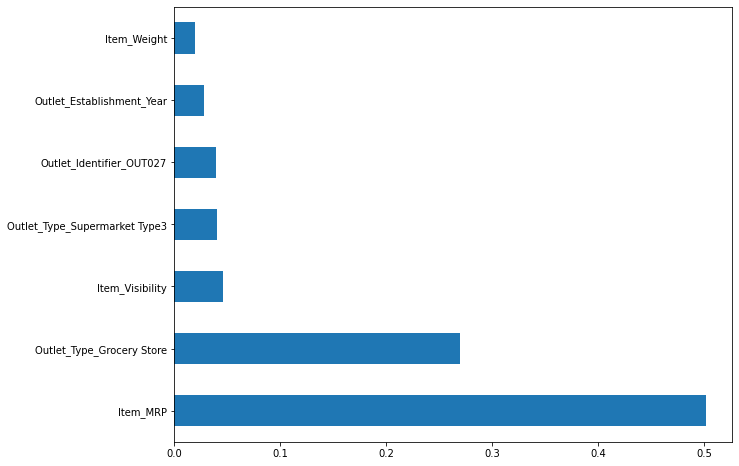

In [13]:
#plot the 7 most important features
plt.figure(figsize=(10,8))
feat_importances = pd.Series(RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [14]:
#training data with top 7 features
train_x_7 = train_x[['Item_MRP',
                      'Outlet_Type_Grocery Store',
                      'Item_Visibility',
                      'Outlet_Identifier_OUT027',
                      'Outlet_Type_Supermarket Type3',
                      'Item_Weight',
                      'Outlet_Establishment_Year']]

#validation data with top 7 important features
valid_x_7 = valid_x[['Item_MRP',
                      'Outlet_Type_Grocery Store',
                      'Item_Visibility',
                      'Outlet_Identifier_OUT027',
                      'Outlet_Type_Supermarket Type3',
                      'Item_Weight',
                      'Outlet_Establishment_Year']]

#create an object of the RandomForestRegressor Model
RFR_with_7 = RandomForestRegressor(max_depth=10, random_state=2)


In [15]:
#fit the model
RFR_with_7.fit(train_x_7, train_y)

#predict the target on the training and validation data
pred_train_with_7 = RFR_with_7.predict(train_x_7)
pred_valid_with_7 = RFR_with_7.predict(valid_x_7)

#RMSE on train and validation data
print('RMSE on train data: ', mean_squared_error(train_y, pred_train_with_7)**(0.5))
print('RMSE on validation data: ', mean_squared_error(valid_y, pred_valid_with_7)**(0.5))

RMSE on train data:  900.2794436902191
RMSE on validation data:  1116.0683486702458


In [16]:
#importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [17]:
#read training dataset
train = pd.read_csv("../input/big-mart-sales-prediction/Train.csv")

In [18]:
#seperate the independent and target variables
train_x = train.drop(columns=['Item_Outlet_Sales'])
train_y = train['Item_Outlet_Sales']

In [19]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform

class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

In [20]:
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

In [21]:
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

In [22]:
# read the test data
test_data = pd.read_csv("../input/big-mart-sales-prediction/Test.csv")

# predict target variables on the test data 
y_sub = model_pipeline.predict(test_data)

In [23]:
y_sub

array([1646.0548363 , 1305.4298012 ,  658.42325097, ..., 1848.60226305,
       3959.67937864, 1384.01466986])

In [24]:
sub = pd.read_csv("../input/big-mart-sales-prediction/Submission.csv")
sub["Item_Outlet_Sales"] = y_sub
sub.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1646.054836
1,1,FDW14,OUT017,1305.429801
2,2,NCN55,OUT010,658.423251
3,3,FDQ58,OUT017,2333.948545
4,4,FDY38,OUT027,5954.092896


In [25]:
sub.to_csv("submission.csv", index=False)